In [92]:
KLEN = 32
MODE = 8
MDS = 0
UB = 1.25

MAX_UB = 4
MNAME = ['CRC', 'tiling', 'CWM', 'CRC-SM', 'RSLB', 'RSLB-pad', 'ROMA', 'Best-merge', '']
BASE32 = [350, 620, 8900, 250, 8200, 8800, 17000, 32000, 2800, 44000, 3400, 4400, 2300]
BASE256 = [2500, 4500, 70000, 1500, 130000, 80000, 160000, 250000, 16000, 400000, 27000, 25000, 13000]

In [93]:
names = []
edge = []
nnz = []
with open('cfg.txt', 'r') as f:
    lines = f.readlines()
    for i, line in enumerate(lines):
        res = [item for item in line.replace('\n', '').split(' ') if len(item) > 0]
        names.append(res[0])
        edge.append(int(res[1]))
        nnz.append(int(res[2]))

total_edges = 0
total_nnz = 0
for (n, e, k) in zip(names, edge, nnz):
    total_edges += e
    total_nnz += k

5392646647.438448


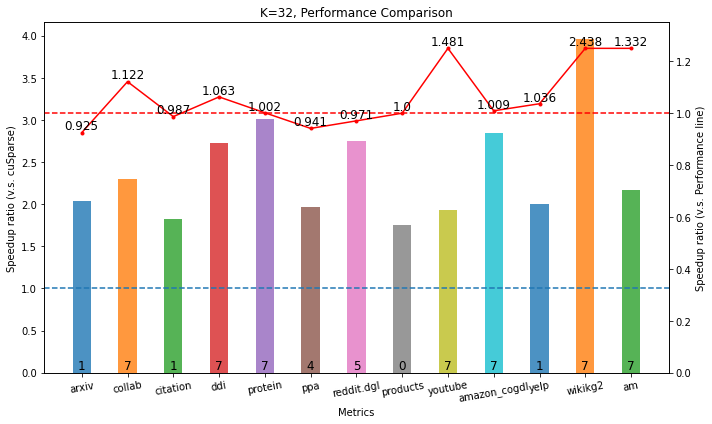

In [94]:
import matplotlib.pyplot as plt

name1 = []
res1 = []
time1 = []
ttime1 = []
best1 = []

for md in range(MDS, MODE):
    try:
        with open(f'{KLEN}_{md}.txt', 'r') as f:
            lines = f.readlines()
            for i, line in enumerate(lines):
                res = [item for item in line.replace('\n', '').split(' ') if len(item) > 0]
                speed = float(res[3])
                tmptime = float(res[2]) * 1000000
                basetime = BASE32[i] if KLEN == 32 else BASE256[i]
                rtime = min(basetime / tmptime, UB)
                if len(name1) <= i:
                    name1.append(res[0])
                    res1.append(speed)
                    time1.append(rtime)
                    best1.append(md)
                    ttime1.append(tmptime)
                elif res1[i] < speed:
                    res1[i] = speed
                    time1[i] = rtime
                    best1[i] = md
                    ttime1[i] = tmptime
    except:
        pass
                
total_time1 = 0
for i, ti in enumerate(ttime1):
    total_time1 += nnz[i] / ti * 1000000
print(total_time1 / 13)

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.4
opacity = 0.8

for i, (name, scores) in enumerate(zip(names, res1)):
    ax.bar(name, scores, bar_width, alpha=opacity, label=name)
plt.xticks(rotation=10)
   
ax.axhline(y=1, linestyle='--')
ax.set_xlabel('Metrics')
ax.set_ylabel('Speedup ratio (v.s. cuSparse)')
ax.set_title('K=32, Performance Comparison')

ax2 = ax.twinx()
ax2.set_ylim([0, UB + 0.1])
ax2.plot(name1, time1, 'r', marker='.')
ax2.axhline(y=1, color='r', linestyle='--')
ax2.set_ylabel('Speedup ratio (v.s. Performance line)')
for i, (perc, tti) in enumerate(zip(time1, ttime1)):
    plt.text(i, perc, round(BASE32[i] / tti, 3), ha='center', va='bottom', fontsize=12)

for i, mode in enumerate(best1):
    plt.text(i, 0, mode, ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

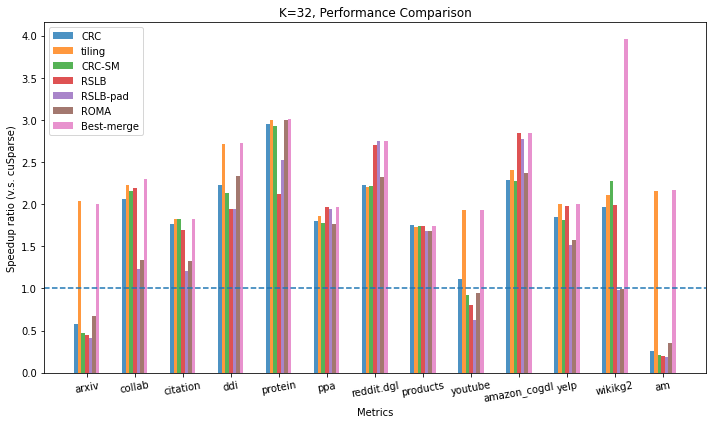

In [95]:
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.6 / MODE
opacity = 0.8

cnt = 0
for md in range(MDS, MODE):
    dataset2 = []
    name2 = []
    res2 = []
    try:
        with open(f'{KLEN}_{md}.txt', 'r') as f:
            lines = f.readlines()
            for line in lines:
                res = [item for item in line.replace('\n', '').split(' ') if len(item) > 0]
                name2.append(res[0])
                res2.append(float(res[3]))
            
        ran = range(len(res2))
        ax.bar([i + bar_width * cnt for i in ran], res2, bar_width, alpha=opacity, label=f'{MNAME[md]}')
        cnt += 1
    except:
        pass

plt.xticks([i + bar_width * (cnt - 1) * 0.5 for i in range(len(names))], names)
plt.xticks(rotation=10)
plt.axhline(y=1, linestyle='--')
ax.set_xlabel('Metrics')
ax.set_ylabel('Speedup ratio (v.s. cuSparse)')
ax.set_title('K=32, Performance Comparison')
ax.legend()

plt.tight_layout()
plt.show()

685893971.415477


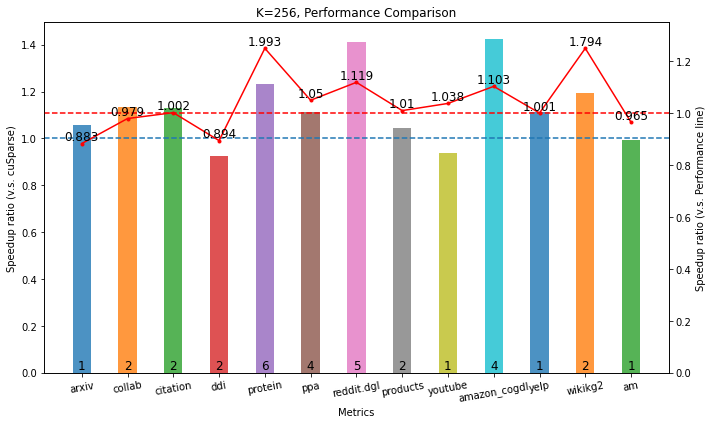

In [96]:
import matplotlib.pyplot as plt

name1 = []
res1 = []
time1 = []
best1 = []
ttime1 = []

for md in range(MDS, MODE):
    try:
        with open(f'{256}_{md}.txt', 'r') as f:
            lines = f.readlines()
            for i, line in enumerate(lines):
                res = [item for item in line.replace('\n', '').split(' ') if len(item) > 0]
                speed = float(res[3])
                tmptime = float(res[2]) * 1000000
                basetime = BASE256[i]
                rtime = min(basetime / tmptime, UB)
                if len(name1) <= i:
                    name1.append(res[0])
                    res1.append(speed)
                    time1.append(rtime)
                    best1.append(md)
                    ttime1.append(tmptime)
                elif res1[i] < speed:
                    res1[i] = speed
                    time1[i] = rtime
                    best1[i] = md
                    ttime1[i] = tmptime
    except:
        pass
                
total_time1 = 0
for i, ti in enumerate(ttime1):
    total_time1 += nnz[i] / ti * 1000000
print(total_time1 / 13)
    
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.4
opacity = 0.8

for i, (name, scores) in enumerate(zip(name1, res1)):
    ax.bar(name, scores, bar_width, alpha=opacity, label=name)
plt.xticks(rotation=10)
 
ax.axhline(y=1, linestyle='--')
ax.set_xlabel('Metrics')
ax.set_ylabel('Speedup ratio (v.s. cuSparse)')
ax.set_title('K=256, Performance Comparison')

ax2 = ax.twinx()
ax2.set_ylim([0, UB + 0.1])
ax2.plot(name1, time1, 'r', marker='.')
ax2.axhline(y=1, color='r', linestyle='--')
ax2.set_ylabel('Speedup ratio (v.s. Performance line)')
for i, (perc, tti) in enumerate(zip(time1, ttime1)):
    plt.text(i, perc, round(BASE256[i] / tti, 3), ha='center', va='bottom', fontsize=12)

for i, mode in enumerate(best1):
    plt.text(i, 0, mode, ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

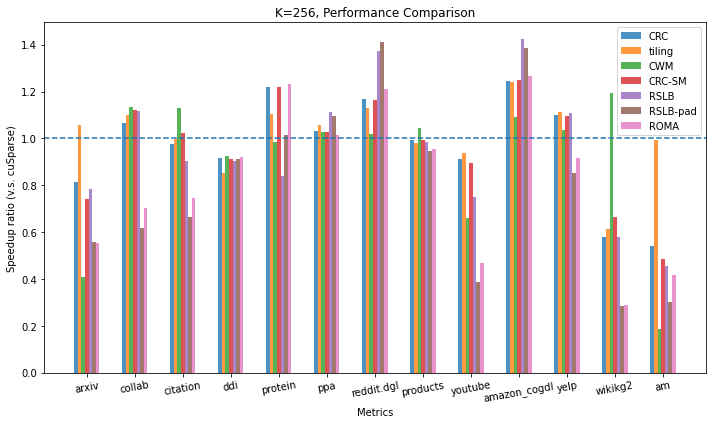

In [97]:

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.6 / MODE
opacity = 0.8

cnt = 0
for md in range(MDS, MODE):
    dataset2 = []
    name2 = []
    res2 = []
    try:
        with open(f'{256}_{md}.txt', 'r') as f:
            lines = f.readlines()
            for line in lines:
                res = [item for item in line.replace('\n', '').split(' ') if len(item) > 0]
                name2.append(res[0])
                res2.append(float(res[3]))
                
        ran = range(len(res2))
        ax.bar([i + bar_width * cnt for i in ran], res2, bar_width, alpha=opacity, label=f'{MNAME[md]}')
        cnt += 1
    except:
        pass

plt.xticks([i + bar_width * (cnt - 1) * 0.5 for i in range(len(names))], names)
plt.xticks(rotation=10)
plt.axhline(y=1, linestyle='--')
ax.set_xlabel('Metrics')
ax.set_ylabel('Speedup ratio (v.s. cuSparse)')
ax.set_title('K=256, Performance Comparison')
ax.legend()

plt.tight_layout()
plt.show()

823111606.1434252


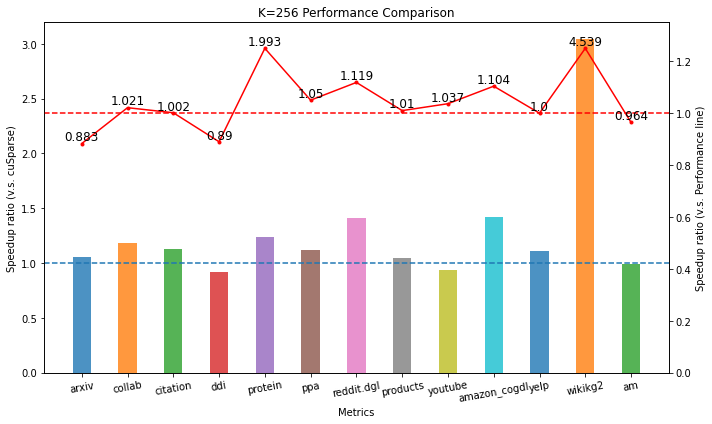

In [99]:
IN_MODE = 256

import matplotlib.pyplot as plt

name1 = []
res1 = []
time1 = []
ttime1 = []

with open(f'in{IN_MODE}.txt', 'r') as f:
    lines = f.readlines()
    for i, line in enumerate(lines):
        res = [item for item in line.replace('\n', '').split(' ') if len(item) > 0]
        speed = float(res[3])
        tmptime = float(res[2]) * 1000000
        basetime = BASE256[i] if IN_MODE == 256 else BASE32[i]
        rtime = min(basetime / tmptime, UB)
        name1.append(res[0])
        res1.append(speed)
        time1.append(rtime)
        ttime1.append(tmptime)

total_time1 = 0
for i, ti in enumerate(ttime1):
    total_time1 += nnz[i] / ti * 1000000
print(total_time1 / 13)

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.4
opacity = 0.8

for i, (name, scores) in enumerate(zip(name1, res1)):
    ax.bar(name, min(scores, MAX_UB), bar_width, alpha=opacity, label=name)
plt.xticks(rotation=10)
    
ax.axhline(y=1, linestyle='--')
ax.set_xlabel('Metrics')
ax.set_ylabel('Speedup ratio (v.s. cuSparse)')
ax.set_title(f'K={IN_MODE} Performance Comparison')

ax2 = ax.twinx()
ax2.set_ylim([0, UB + 0.1])
ax2.plot(name1, time1, 'r', marker='.')
ax2.axhline(y=1, color='r', linestyle='--')
ax2.set_ylabel('Speedup ratio (v.s. Performance line)')
for i, (perc, tti) in enumerate(zip(time1, ttime1)):
    plt.text(i, perc, round((BASE256[i] if IN_MODE == 256 else BASE32[i]) / tti, 3), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()